In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Solving Conductive Heat Transfer: Case of a window, with and without an insulating aire layer

In this training we wish to solve the 1D  conductive heat transfer problem. We will consider heat transfer in a 1D slab of material It could be a glass window for example.. The medium has a width L and a thermal conductivity K and a specific heat Cp and density $\rho$. 



The 1D heat diffusion equations reads :
    $\frac{\partial T}{\partial t}-\frac{K}{\rho Cp}\frac{\partial^2 T}{\partial x^2}=\frac{SK}{\rho Cp}$

where S is an energy source term (in $w/m^2$) that is non-zero if we inject energy in the system. For the moment we will assume that S=0

For glass, $K\simeq 1 w/m/K$, Cp=753 J/Kg/K, $\rho=2500 Kg/m^3$

## Diffusion timescale and the Courant condition (CFL)

We assume initially that the glass width is L =1 cm, and that the temperature everywhere is 300K initially. The right (x=0) and left (x=L) temperatures of the glass is $T_L$ and $T_R$. We will change the glass left and right temperatures and see how the temperature profile (T(x) for x ranging from 0 to L) evolves.

By doing a simple dimensional analysis, find a characteristic timescale $T_d$ using L (the width of the window),  $T_d$ as a functio of L, K, $\rho$ $Cp$. $T_d$ is the diffusion timescale. We can also recognize that $D=K/\rho C_p$ is a diffusion coefficient, so the classical theory for diffusion processes applies here... 

$T_d=??$

calculating the units for D:

$$D =  \frac{K}{\rho C_p} = \frac{[w][K]}{[m]} \frac{[Kg]}{[J][K]} \frac{[m^3]}{[Kg]} = \frac{[m^2]}{[s]}$$

A reasonable timescale $T_d$ would be:

$$ T_d = \frac{L^2}{D}  $$

In [2]:
L = 0.01 #m
K = 1 # wK/m
C_p = 753 #JK/Kg
rho = 2500 #Kg/m3

D = K/(rho*C_p) # m2/s

T_d = (L**2)/D # s

print("D for glass = {:.6f}".format(D))
print("The characteristic timescale T_d is {:.2f} s".format(T_d))

D for glass = 0.000001
The characteristic timescale T_d is 188.25 s


## Discretization of the problem

Now we want to solve the diffusion equation using a finite difference method.
We need first to write the integration scheme.
we call $x_i=i*dx$, $t_j=j*dt$ with i,j, integers, and dt and dx standing for the timestep and space step respectively. Let's call $T_i^j$ the numerical approximation to $T(x_i,t_j)$

We start soing first order in time and second order in space. 
For the time derive use a forward 1st order derivative. Give the 1st order forward approximation.

$$\frac{\partial T_i^j}{\partial t}= \frac{T_i^{j+1} - T_i^j}{dt} +o(dt)$$

For the temperature space derivative we need the second order derivative. As diffusion ois a process acting in both directions simultaneously we can use a centered scheme. Provide a 1st order cetered approximation to the second order derivative : You can have a look here : https://en.wikipedia.org/wiki/Finite_difference

$$\frac{\partial^2 T_i^j}{\partial x^2}= \frac{T_{i+1}^{j} - 2T_i^j + T_{i-1}^j}{dx^2} +o(dx^2)$$

From the above two expressions, build an integration scheme for the Heat diffusion equation :

$T^{j+1}_i=T^{j}_i + \left(D\frac{dt}{dx^2}\right) (T_{i+1}^j - 2T_i^j + T_{i-1}^j) $

We will discretise space by using N=50 cells. What is the time necessary, $T_{cell}$ for heat to diffuse over a cell ??  
 

$$T_{cell}=\frac{dx^2}{D}$$

$$dx = L/N$$

$$T_{cell}=\frac{L^2}{N^2 D}$$

In [3]:
N_cells = 50
T_cell = (L**2)/((N_cells**2)*D)
print("T_cell is {} s".format(T_cell))

T_cell is 0.07529999999999999 s


## Numerically solving heat transfer accross the window

We will make sure, in the following to choose dt < $T_{cell}$. This will be our "CFL" condition in the diffusion case.


As boundary conditions, we will put $T_1^0=T_L$ and $T_N^0=T_R$, with $T_R=300K$ (warm interior) and $T_L=273K$ (freezing cold outside!).

The initial state is $T^0_{2..N-1}=300K$

integrate the evolution of the temperature from t=0 to $t_{end} = 10 T_d$


Write the code that compute the Evolution of the temperature profile. You have to 

*1) Define the X axis, dt, dx, the different constant, TR, TL

*2) Initialise T

*3) Do a loop over time. 

*4)      Compute dT/dt for each space bin i

*5)      Update T for each space bin i 

*6)     Update time

*7)     end of loop








DO : Provide 5 or 6 plots from 0 to $t_{end}$ display how heat is transfered

DO : show that at equilibrium the thermal gradient is constant.

In [4]:
dx  = L/N_cells #dx as the total length divided in N steps
dt = 0.5*T_cell #dt smaller than T_cell
sigma = D*dt/(dx**2) #sigma factor

print("Simulation parameters: \n dx = {:.4f} \n dt = {:.4f} \n sigma = {:.4f}".format(dx,dt,sigma))

t_max = 10*T_d  # untegrate until 10Td
n_steps = int(t_max/dt)+1 # necessary time steps

print("Discretized space:\n N cells = {} \n n steps = {}".format(N_cells,n_steps))

TR = 300 # temperature in the right bound
TL = 273 # temperature in the left bound
To = 300 # initial temperature 

T_evolution = np.zeros([N_cells,n_steps]) #storing the evolution in time for T

 # initial condition
T_evolution[:,0] = To
T_evolution[0,0] = TL
T_evolution[-1,0] = TR

for n in range(1,n_steps):
    for i in range(1,N_cells-1):
        imin = i-1
        iplus = i+1
        T_evolution[i,n] = T_evolution[i,n-1] + sigma * (T_evolution[i+1,n-1]-2*T_evolution[i,n-1]+T_evolution[i-1,n-1])

    T_evolution[0,n] = TL
    T_evolution[-1,n] = TR





Simulation parameters: 
 dx = 0.0002 
 dt = 0.0376 
 sigma = 0.5000
Discretized space:
 N cells = 50 
 n steps = 50001


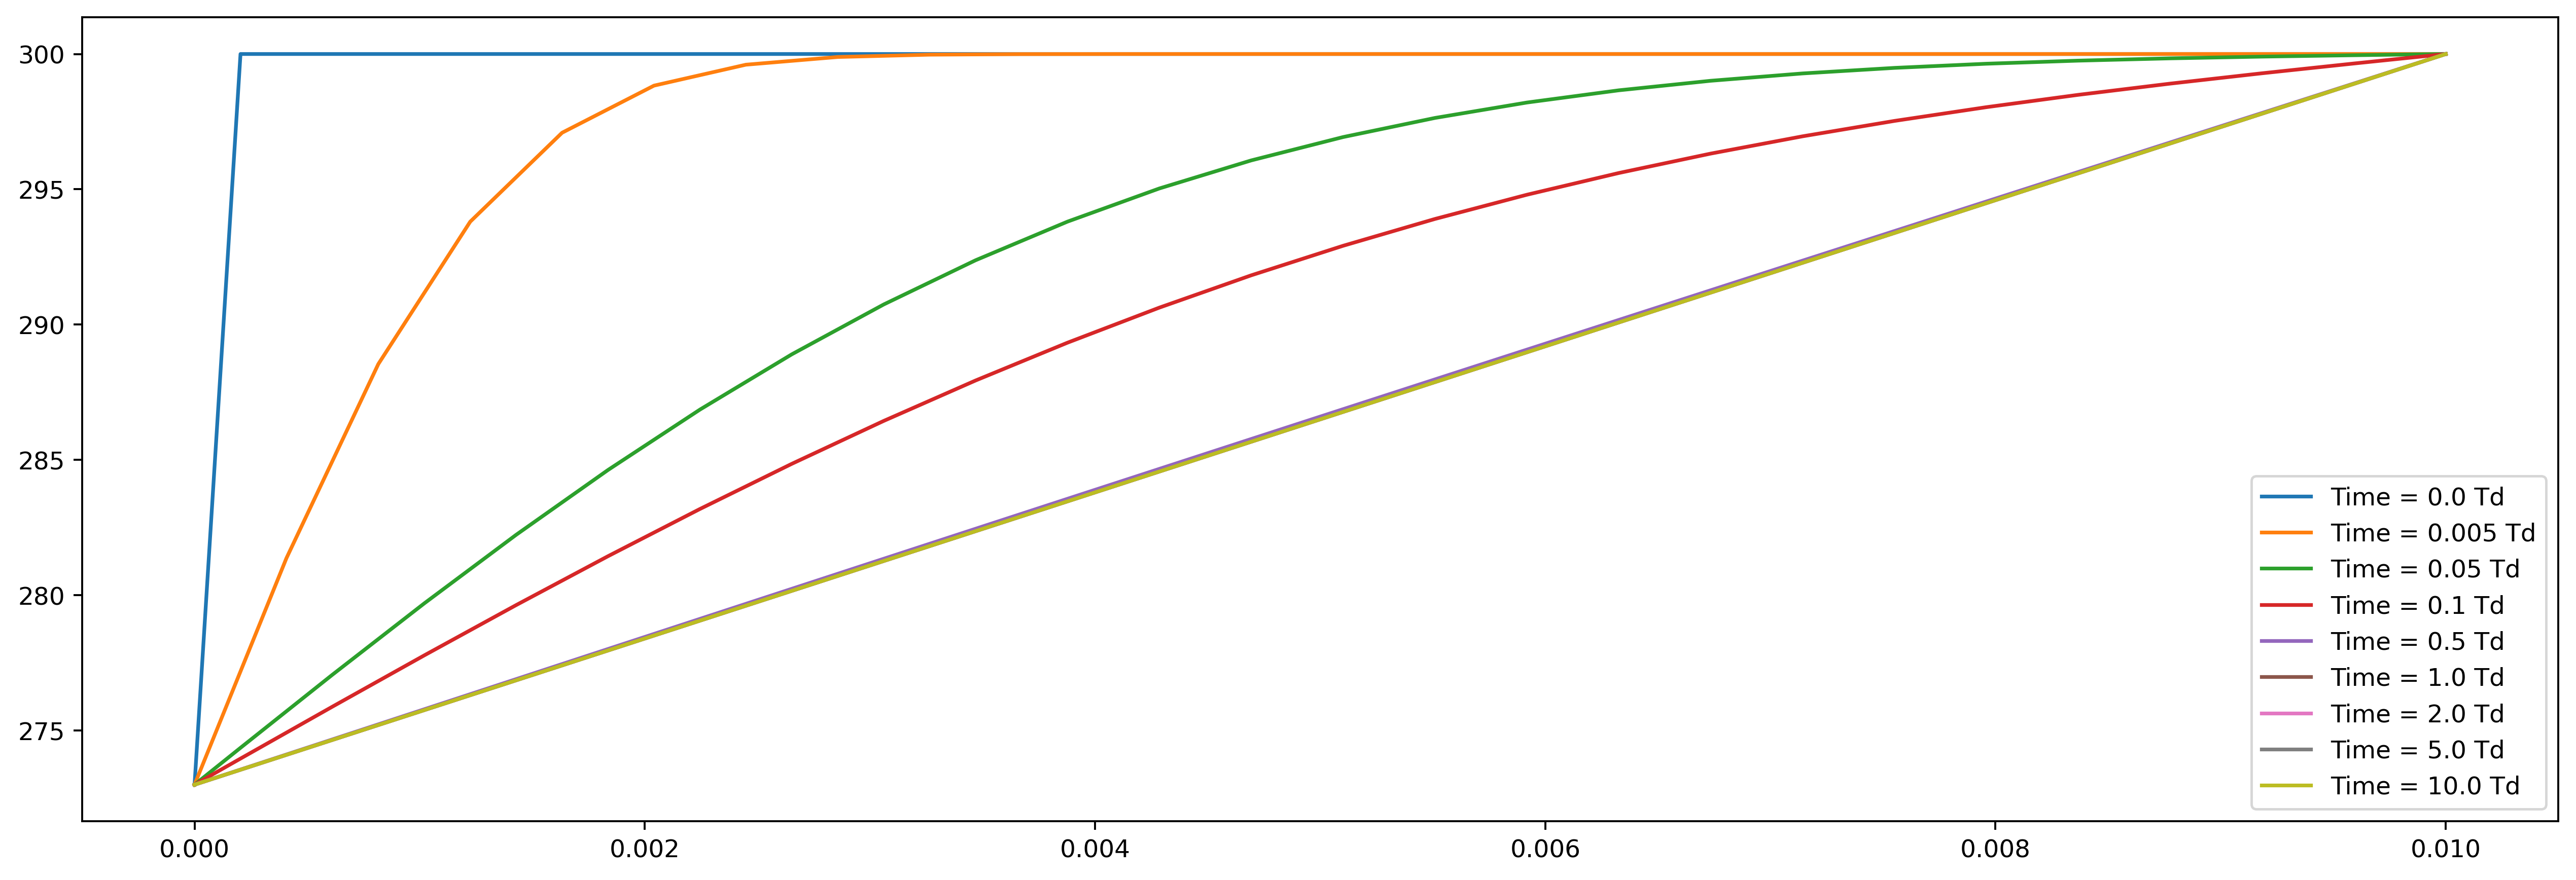

In [5]:
plot_t = [0,0.005,0.05,0.1,0.5,1,2,5,10]

plt.figure(figsize=(18,6),dpi=350)

for i in range(len(plot_t)):
    index_t = int(plot_t[i]*T_d/dt)
    t_vals = T_evolution[:,index_t]
    x = np.linspace(0,L,N_cells)
    time_t = (index_t*dt/T_d)
    #plt.subplot(int(len(plot_t)/2),2,i+1)
    plt.plot(x,t_vals,label="Time = {} Td".format(round(time_t,3)))
    plt.legend()

We can observe that the convergence of the system after a long period of time is to a linear gradient between the boundaries of the glass. this is shown by the timestep after 0.3 $T_d$

## Heat flux toward the exterior : energy loss 

At equilibrium what is the heat flux ? F=-D$\frac{\partial T}{\partial x}$, with D standing for the diffusion coefficient 

Since at equilibrium the gradient is linear, we can deduce that the gradient can be calculated from the absolute change in X and T between the boundaries.

$$F= -D \frac{\partial T}{\partial x} = -D \frac{\Delta T}{\Delta x} = -D \frac{|T_R-T_L|}{L} $$

In [6]:
lin_flux = -D*np.abs(TR-TL)/L

print("The heat flux at equilibrium is {:.5f} K m/s".format(lin_flux))

The heat flux at equilibrium is -0.00143 K m/s


## Inserting an insulating air-layer

Now we put an insulating layer with air. So our window is like a "sandwich", with 0.3 mm of glass, 0.4 mm of air, 0.3 mm of glass.  Air characteristics are at 273K :
K=0.025 W/m/K , Cp=1005 J/K/Kg, and $\rho= 1.30 Kg/m^3$.

Redo the same exercice as above :

Write the new code (BEWARE : now K, RHO, Cp are not the same evrywhere!!!!)

What is the effect of the insulating layer ? Show with plots 

What is the Thermal profile in the thickness of the window ?


What is the final heat flux ?

Conclusion ? What is the interest of the insulating layer ?


In [11]:
## GLASS CHARACTERISTICS
L_glass = 0.0003 #m
K_glass = 1.0 # wK/m
C_p_glass = 753.0 #JK/Kg
rho_glass = 2500.0 #Kg/m3

D_glass = K_glass/(rho_glass*C_p_glass) # m2/s
T_d_glass = (L_glass**2)/D_glass # s
T_cell_glass= (L_glass**2)/((N_cells**2)*D_glass)

## AIR CHARACTERISTICS
L_air = 0.0004 #m
K_air = 0.025 # wK/m
C_p_air = 1005.0 #JK/Kg
rho_air = 1.3 #Kg/m3

D_air = K_air/(rho_air*C_p_air) # m2/s
T_d_air = (L_air**2)/D_air # s
T_cell_air = (L_air**2)/((N_cells**2)*D_air)
print(" D for air  = {:.6f} \n D for glass = {:.6f}".format(D_air,D_glass))

# SIM CHARACTERISTICS
L = 2.0*L_glass + L_air 
T_d = np.min([T_d_glass,T_d_air]) #we will use the minimun of the two characteristic timescales
T_cell = np.min([T_cell_air,T_cell_glass])


N_cells = 50
print("L = {}".format(L))
print("The characteristic timescale T_d is {:.2f} s".format(T_d))
print("T_cell is {} s".format(T_cell))

dx  = L/N_cells #dx as the total length divided in N steps (we use the )
dt = 0.5*T_cell #dt smaller than T_cell


sigma_glass = D_glass*dt/(dx**2) #sigma factor
sigma_air = D_air*dt/(dx**2)
print("Simulation parameters: \n dx = {:.4f} \n dt = {:.4f} \n sigma_air = {:.4f}\n sigma_glass = {:.4f}".format(dx,dt,sigma_air,sigma_glass))


 D for air  = 0.000019 
 D for glass = 0.000001
L = 0.001
The characteristic timescale T_d is 0.01 s
T_cell is 3.34464e-06 s
Simulation parameters: 
 dx = 0.0000 
 dt = 0.0000 
 sigma_air = 0.0800
 sigma_glass = 0.0022


In [12]:
t_max = 20*T_d  # untegrate until 10Td
n_steps = int(t_max/dt)+1 # necessary time steps

step_g_a = int(L_glass/dx) #space step where the first interface is reached(glass to air)
step_a_g = int((L_glass+L_air)/dx) #space step where the second interface is reached (air to glass)
print("Discretized space:\n N cells = {} \n n steps = {}".format(N_cells,n_steps))

TR = 300 # temperature in the right bound
TL = 273 # temperature in the left bound
To = 300 # initial temperature 

T_evolution_noisol = np.zeros([N_cells,n_steps]) #storing the evolution in time for T(no air barrier)
T_evolution_isol = np.zeros([N_cells,n_steps]) #storing the evolution in time for T( air barrier)


print("calculating evolution...")
 # initial condition (no air)
T_evolution_noisol[:,0] = To
T_evolution_noisol[0,0] = TL
T_evolution_noisol[-1,0] = TR
# initital condition (Air)
T_evolution_isol[:,0] = To
T_evolution_isol[0,0] = TL
T_evolution_isol[-1,0] = TR

for n in range(1,n_steps):

    for i in range(1,N_cells-1):
        #for the glass
        if(np.logical_or(i<=step_g_a,i>step_a_g ) ):
            T_evolution_isol[i,n] = T_evolution_isol[i,n-1] + sigma_glass * (T_evolution_isol[i+1,n-1]-2*T_evolution_isol[i,n-1]+T_evolution_isol[i-1,n-1])
            T_evolution_noisol[i,n] = T_evolution_noisol[i,n-1] + sigma_glass * (T_evolution_noisol[i+1,n-1]-2*T_evolution_noisol[i,n-1]+T_evolution_noisol[i-1,n-1])
        #for the air layer
        else:
            T_evolution_isol[i,n] = T_evolution_isol[i,n-1] + sigma_air* (T_evolution_isol[i+1,n-1]-2*T_evolution_isol[i,n-1]+T_evolution_isol[i-1,n-1])
            T_evolution_noisol[i,n] = T_evolution_noisol[i,n-1] + sigma_glass* (T_evolution_noisol[i+1,n-1]-2*T_evolution_noisol[i,n-1]+T_evolution_noisol[i-1,n-1])
    T_evolution_noisol[0,n] = TL
    T_evolution_noisol[-1,n] = TR
    T_evolution_isol[0,n] = TL
    T_evolution_isol[-1,n] = TR
    
print("Done")



Discretized space:
 N cells = 50 
 n steps = 100001
calculating evolution...
Done


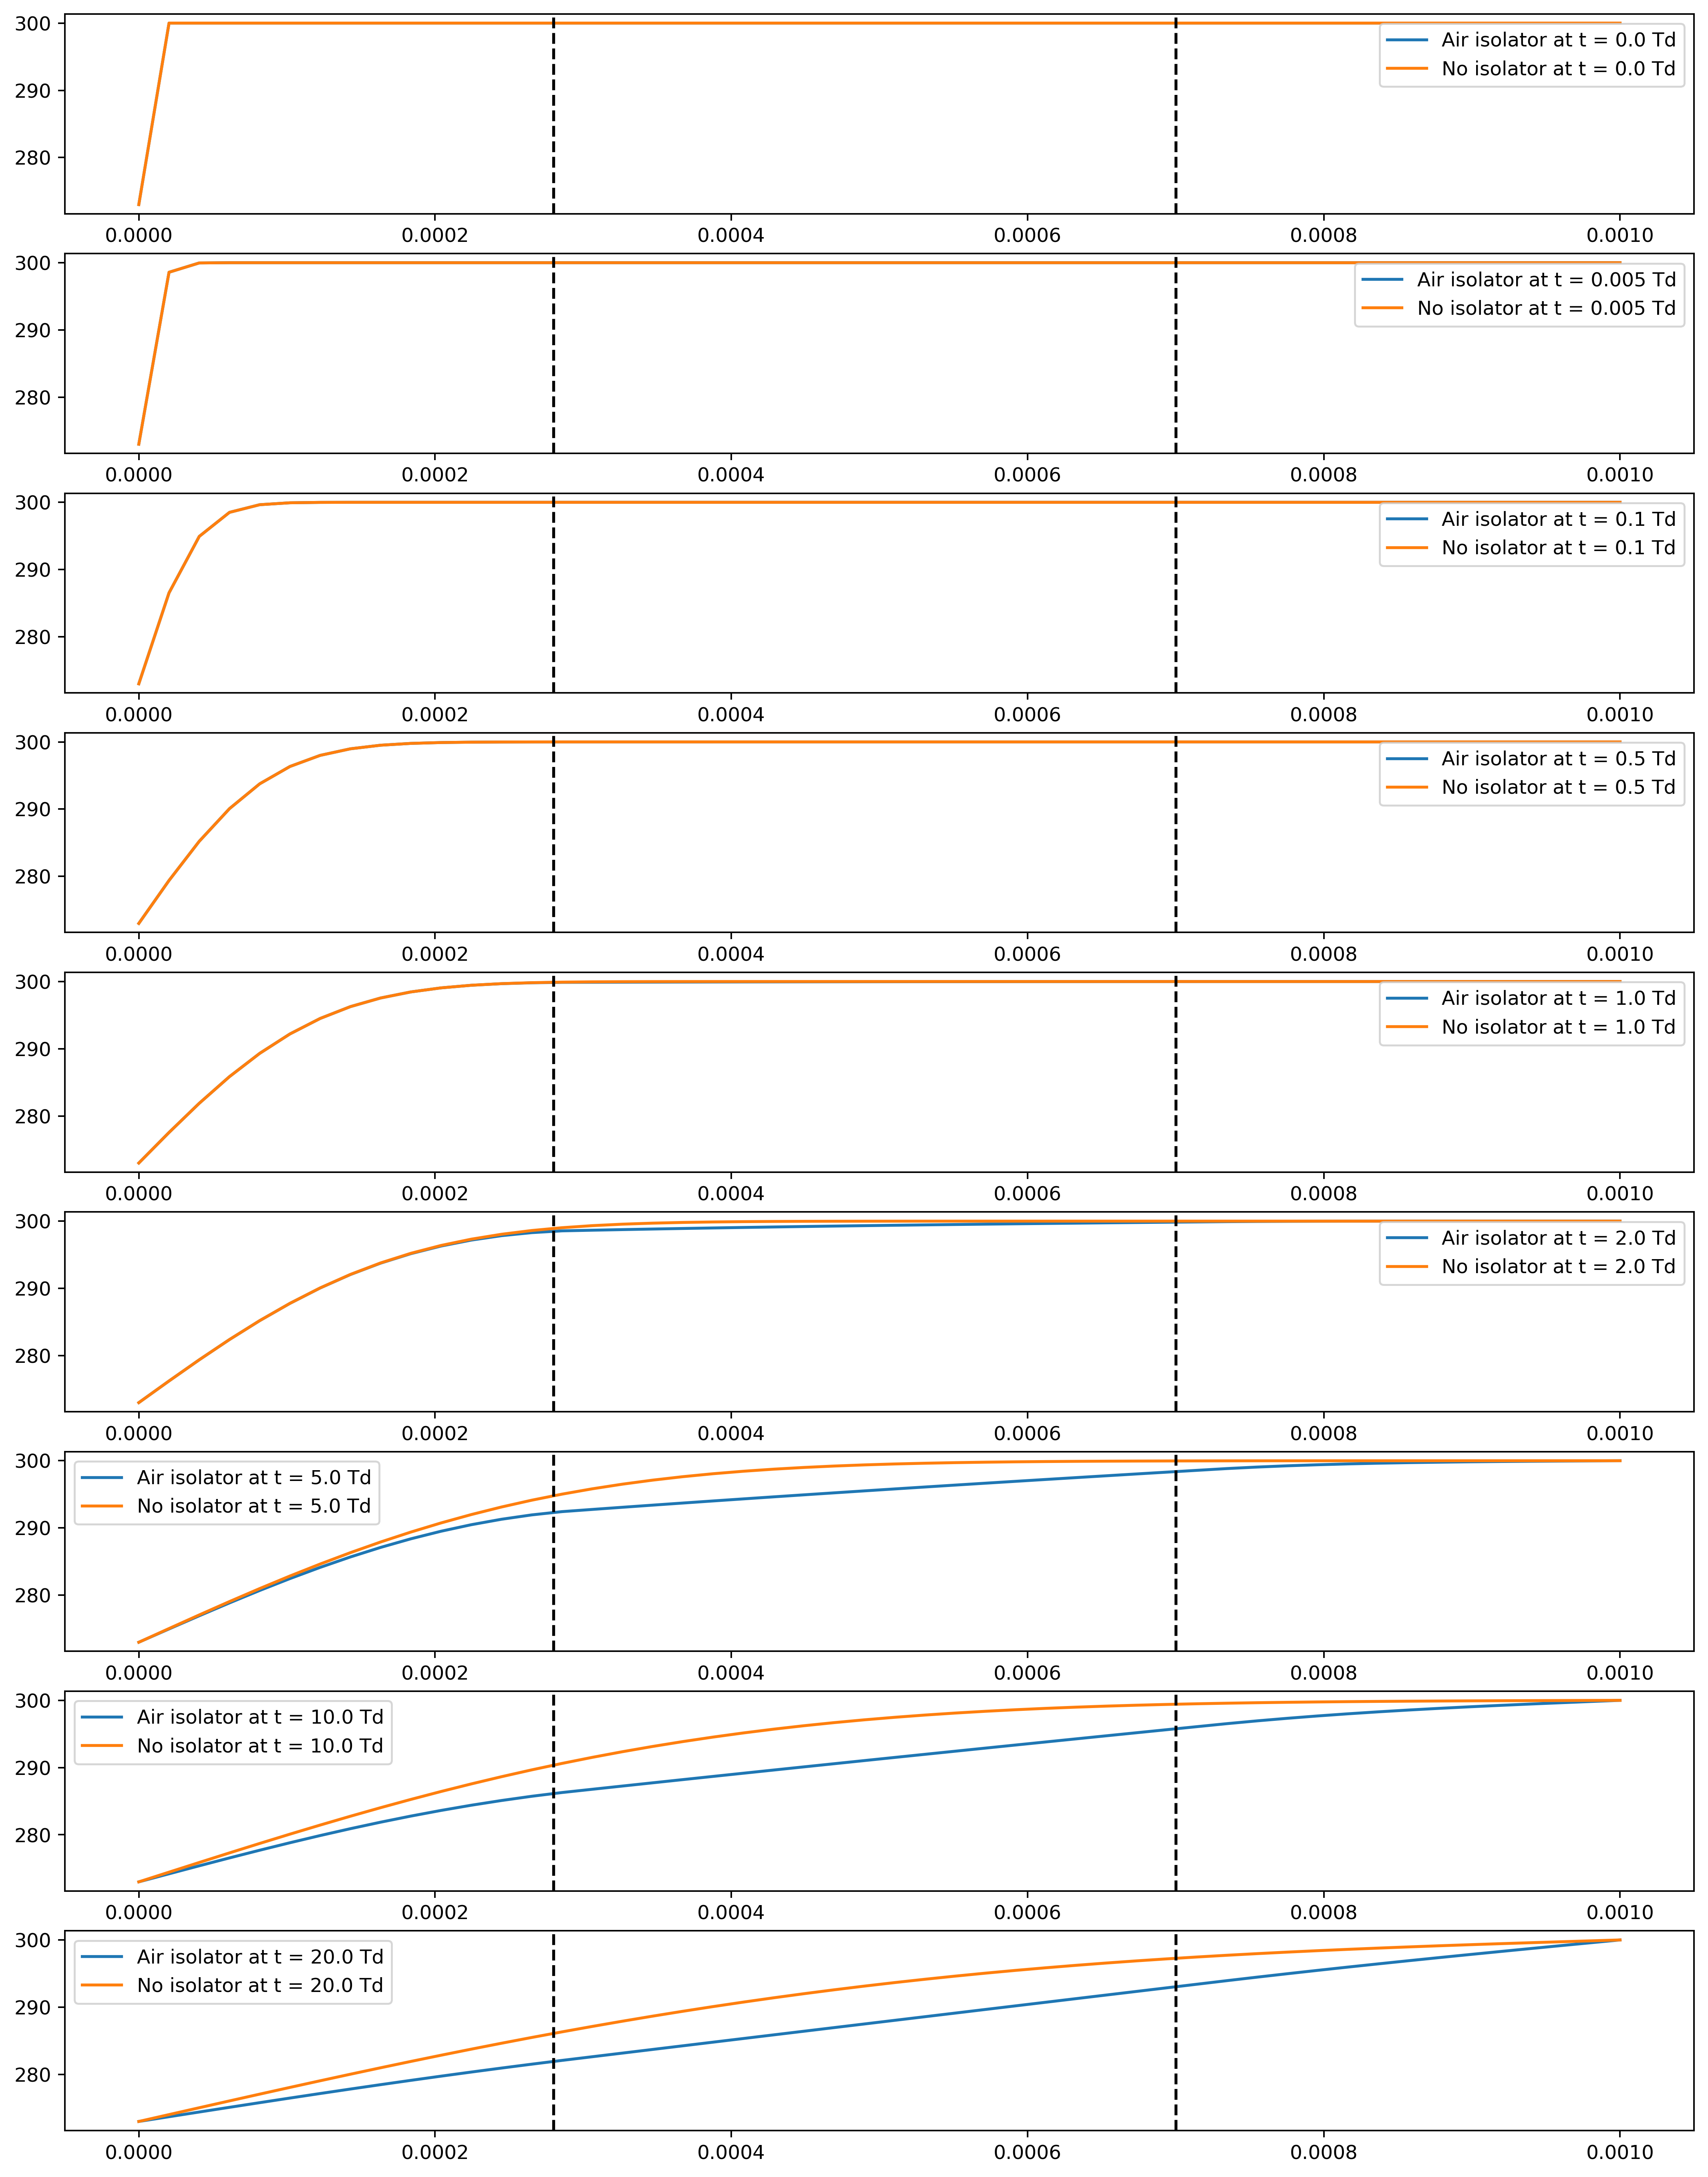

In [13]:
plot_t = [0,0.005,0.1,0.5,1,2,5,10,20]


plt.figure(figsize=(15,20),dpi=350)

for i in range(len(plot_t)):
    plt.subplot(len(plot_t),1,i+1)
    index_t = int(plot_t[i]*T_d/dt)
    t_vals_noisol = T_evolution_noisol[:,index_t]
    t_vals_isol = T_evolution_isol[:,index_t]
    x = np.linspace(0,L,N_cells)
    time_t = (index_t*dt/T_d)
    
    plt.plot(x,t_vals_isol,label="Air isolator at t = {} Td".format(round(time_t,3)))
    plt.plot(x,t_vals_noisol,label="No isolator at t = {} Td".format(round(time_t,3)))
    plt.axvline(step_g_a * dx,linestyle="--",c="k")
    plt.axvline(step_a_g * dx,linestyle="--",c="k")
    plt.legend()


## 2nd order in time method

optional : Redo the resolution but with a method that is second order in time

In [26]:
## GLASS CHARACTERISTICS
L_glass = 0.0003 #m
K_glass = 1.0 # wK/m
C_p_glass = 753.0 #JK/Kg
rho_glass = 2500.0 #Kg/m3

D_glass = K_glass/(rho_glass*C_p_glass) # m2/s
T_d_glass = (L_glass**2)/D_glass # s
T_cell_glass= (L_glass**2)/((N_cells**2)*D_glass)

## AIR CHARACTERISTICS
L_air = 0.0004 #m
K_air = 0.025 # wK/m
C_p_air = 1005.0 #JK/Kg
rho_air = 1.3 #Kg/m3

D_air = K_air/(rho_air*C_p_air) # m2/s
T_d_air = (L_air**2)/D_air # s
T_cell_air = (L_air**2)/((N_cells**2)*D_air)
print(" D for air  = {:.6f} \n D for glass = {:.6f}".format(D_air,D_glass))

# SIM CHARACTERISTICS
L = 2.0*L_glass + L_air 
T_d = np.min([T_d_glass,T_d_air]) #we will use the minimun of the two characteristic timescales
T_cell = np.min([T_cell_air,T_cell_glass])


N_cells = 50
print("L = {}".format(L))
print("The characteristic timescale T_d is {:.2f} s".format(T_d))
print("T_cell is {} s".format(T_cell))

dx  = L/N_cells #dx as the total length divided in N steps (we use the )
dt = 0.5*T_cell #dt smaller than T_cell


sigma_glass = D_glass*dt/(dx**2) #sigma factor
sigma_air = D_air*dt/(dx**2)
print("Simulation parameters: \n dx = {:.4f} \n dt = {:.4f} \n sigma_air = {:.4f}\n sigma_glass = {:.4f}".format(dx,dt,sigma_air,sigma_glass))


 D for air  = 0.000019 
 D for glass = 0.000001
L = 0.001
The characteristic timescale T_d is 0.01 s
T_cell is 3.34464e-06 s
Simulation parameters: 
 dx = 0.0000 
 dt = 0.0000 
 sigma_air = 0.0160
 sigma_glass = 0.0004


In [27]:
t_max = 10*T_d  # untegrate until 10Td
n_steps = int(t_max/dt)+1 # necessary time steps

step_g_a = int(L_glass/dx) #space step where the first interface is reached(glass to air)
step_a_g = int((L_glass+L_air)/dx) #space step where the second interface is reached (air to glass)
print("Discretized space:\n N cells = {} \n n steps = {}".format(N_cells,n_steps))

TR = 300 # temperature in the right bound
TL = 273 # temperature in the left bound
To = 300 # initial temperature 

T_evolution_noisol = np.zeros([N_cells,n_steps]) #storing the evolution in time for T(no air barrier)
T_evolution_isol = np.zeros([N_cells,n_steps]) #storing the evolution in time for T( air barrier)


print("calculating evolution...")
 # initial condition
T_evolution_noisol[:,0] = To
T_evolution_noisol[0,0] = TL
T_evolution_noisol[-1,0] = TR

T_evolution_isol[:,0] = To
T_evolution_isol[0,0] = TL
T_evolution_isol[-1,0] = TR

for n in range(1,n_steps):

    for i in range(1,N_cells-1):
        imin = i-1
        iplus = i+1
        if(i==1):
            T_evolution_isol[i,n] = T_evolution_isol[i,n-1] + sigma_glass * (T_evolution_isol[i+1,n-1]-2*T_evolution_isol[i,n-1]+T_evolution_isol[i-1,n-1])
            T_evolution_noisol[i,n] = T_evolution_noisol[i-1,n-1] + sigma_glass * (T_evolution_noisol[i+1,n-1]-2*T_evolution_noisol[i,n-1]+T_evolution_noisol[i-1,n-1])
        elif(np.logical_or(i<=step_g_a,i>step_a_g ) ):
            T_evolution_isol[i,n] = T_evolution_isol[i,n-2] + 2*sigma_glass * (T_evolution_isol[i+1,n-1]-2*T_evolution_isol[i,n-1]+T_evolution_isol[i-1,n-1])
            T_evolution_noisol[i,n] = T_evolution_noisol[i,n-2] + 2*sigma_glass * (T_evolution_noisol[i+1,n-1]-2*T_evolution_noisol[i,n-1]+T_evolution_noisol[i-1,n-1])
        else:
            T_evolution_isol[i,n] = T_evolution_isol[i,n-2] + 2*sigma_air* (T_evolution_isol[i+1,n-1]-2*T_evolution_isol[i,n-1]+T_evolution_isol[i-1,n-1])
            T_evolution_noisol[i,n] = T_evolution_noisol[i,n-2] + 2*sigma_glass* (T_evolution_noisol[i+1,n-1]-2*T_evolution_noisol[i,n-1]+T_evolution_noisol[i-1,n-1])
    T_evolution_noisol[0,n] = TL
    T_evolution_noisol[-1,n] = TR
    T_evolution_isol[0,n] = TL
    T_evolution_isol[-1,n] = TR
    
print("Done")



Discretized space:
 N cells = 50 
 n steps = 250001
calculating evolution...


<ipython-input-27-9f0c9aaffe22>:38: RuntimeWarning: overflow encountered in double_scalars
  T_evolution_isol[i,n] = T_evolution_isol[i,n-2] + 2*sigma_air* (T_evolution_isol[i+1,n-1]-2*T_evolution_isol[i,n-1]+T_evolution_isol[i-1,n-1])
<ipython-input-27-9f0c9aaffe22>:32: RuntimeWarning: invalid value encountered in double_scalars
  T_evolution_isol[i,n] = T_evolution_isol[i,n-1] + sigma_glass * (T_evolution_isol[i+1,n-1]-2*T_evolution_isol[i,n-1]+T_evolution_isol[i-1,n-1])


Done


IndexError: index 500000 is out of bounds for axis 1 with size 250001

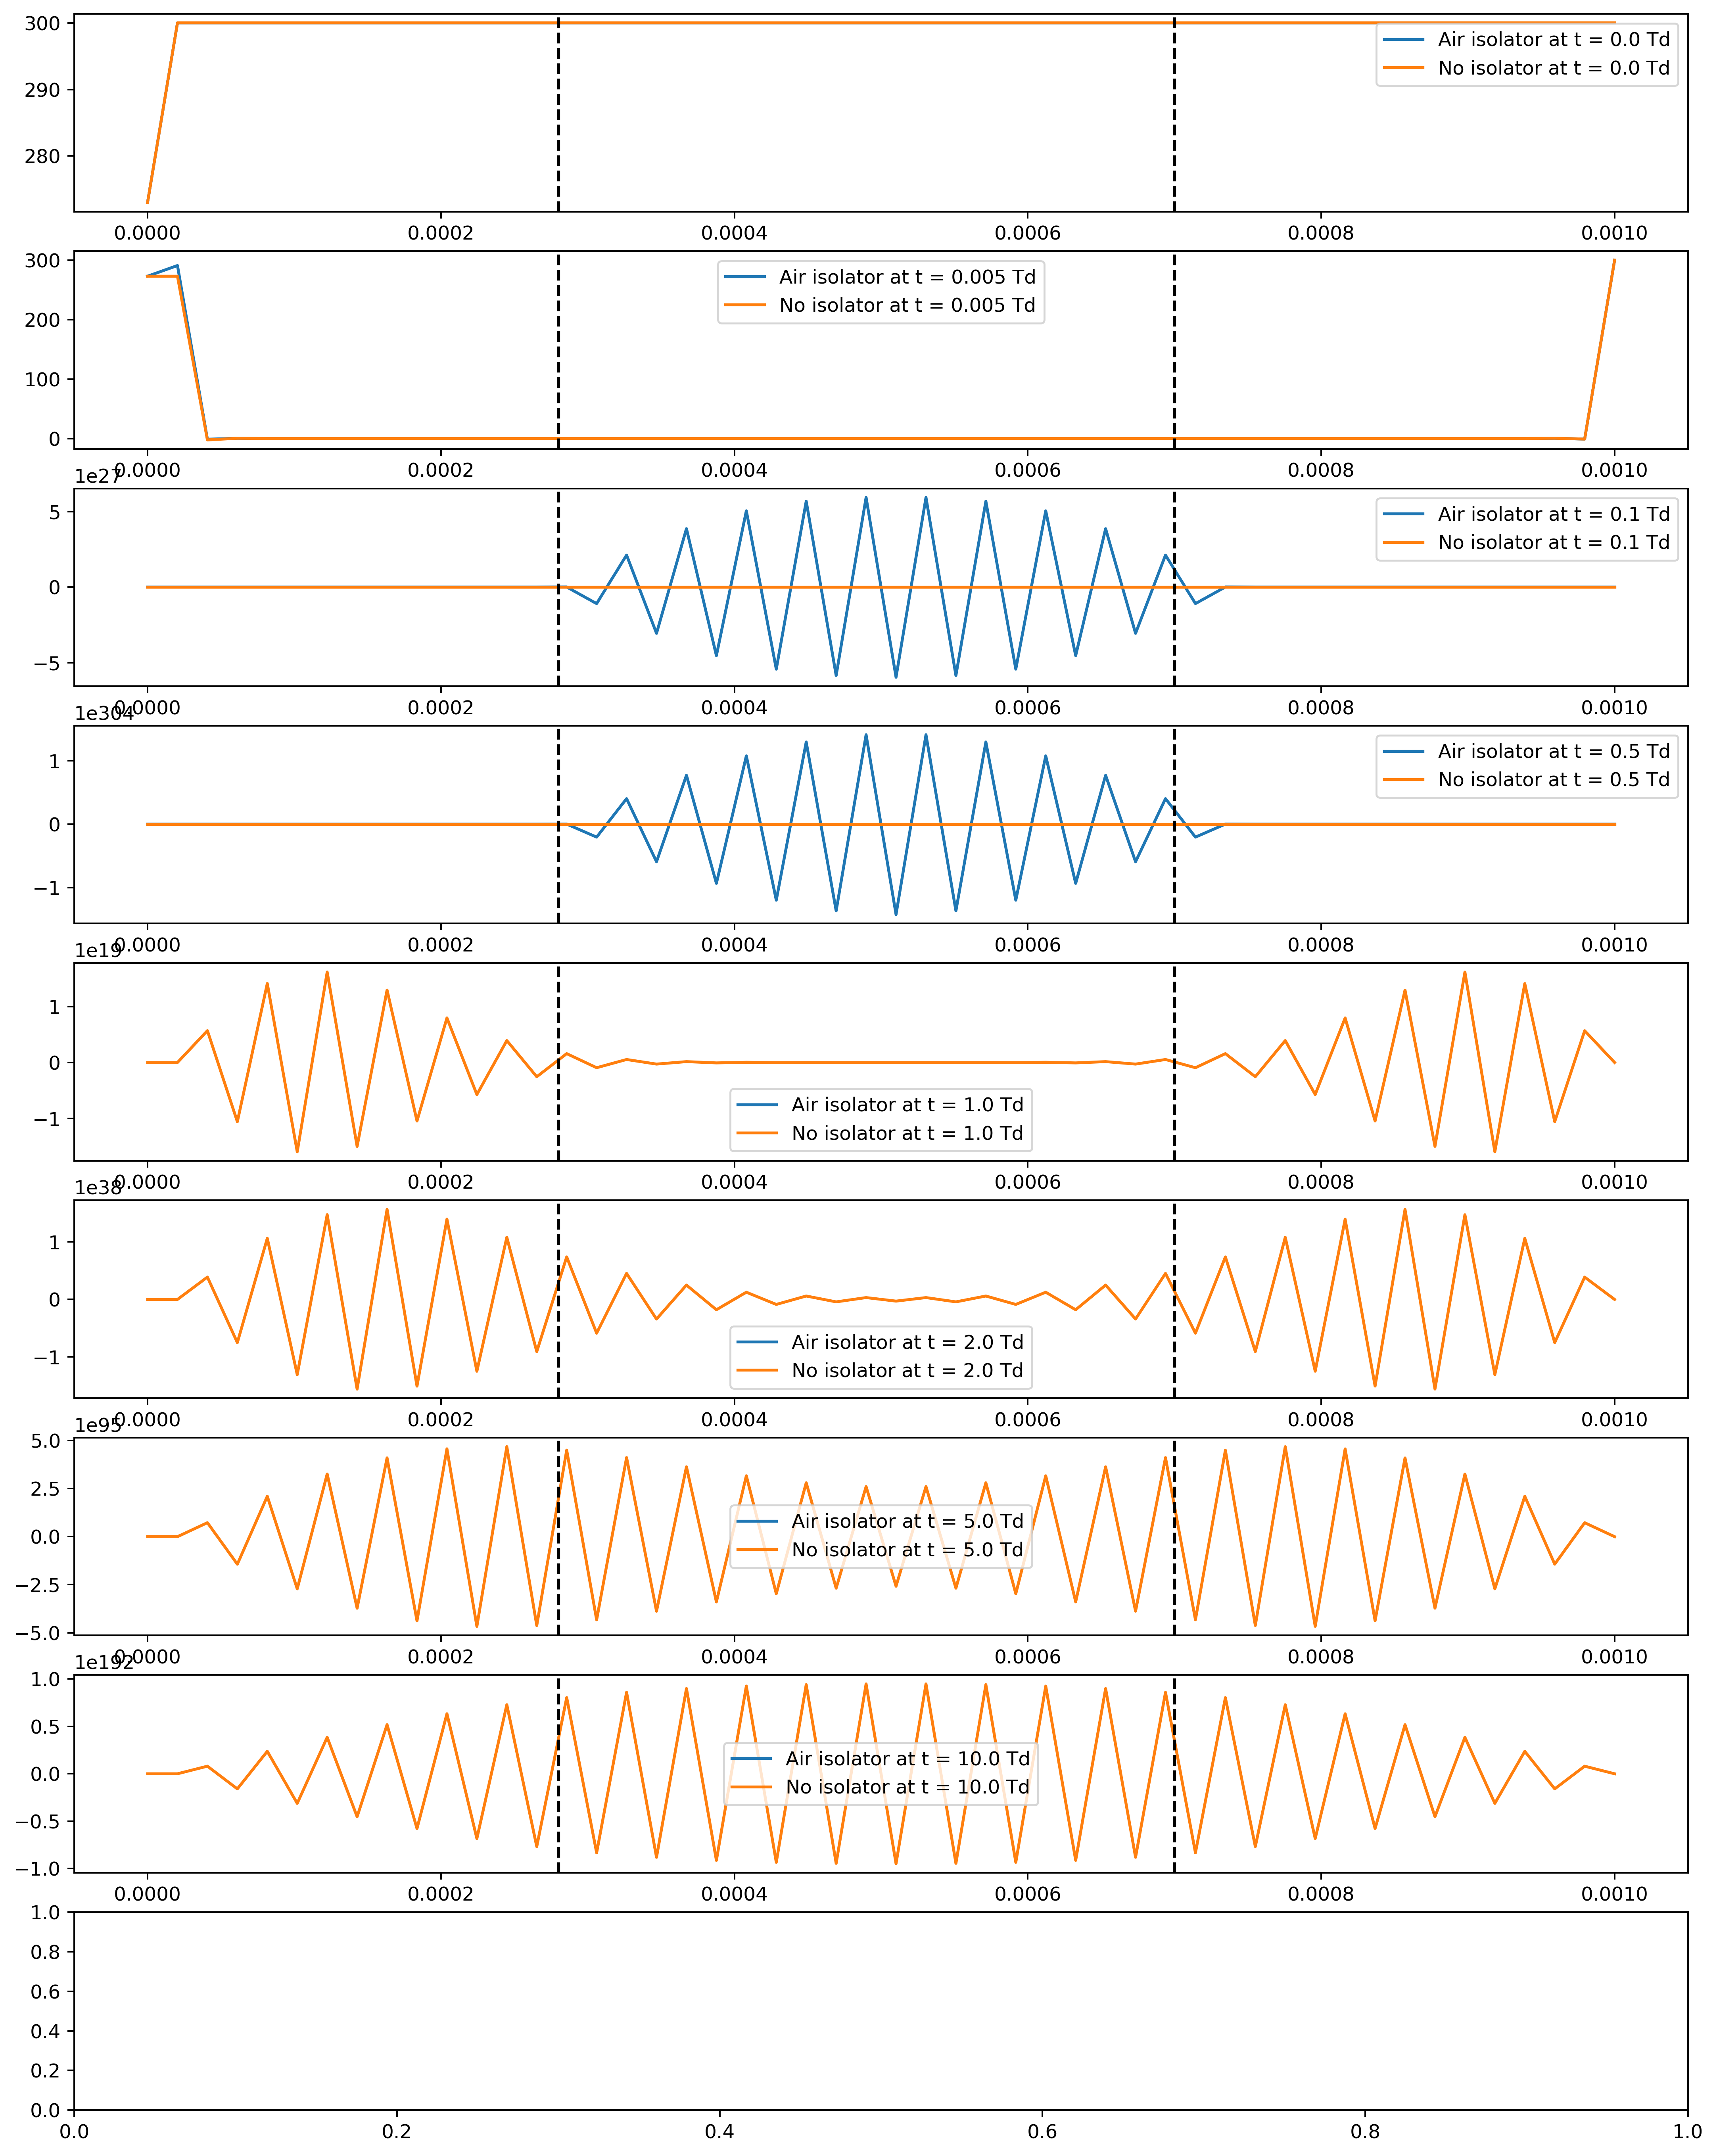

In [28]:
plot_t = [0,0.005,0.1,0.5,1,2,5,10,20]


plt.figure(figsize=(15,20),dpi=350)

for i in range(len(plot_t)):
    plt.subplot(len(plot_t),1,i+1)
    index_t = int(plot_t[i]*T_d/dt)
    t_vals_noisol = T_evolution_noisol[:,index_t]
    t_vals_isol = T_evolution_isol[:,index_t]
    x = np.linspace(0,L,N_cells)
    time_t = (index_t*dt/T_d)
    
    plt.plot(x,t_vals_isol,label="Air isolator at t = {} Td".format(round(time_t,3)))
    plt.plot(x,t_vals_noisol,label="No isolator at t = {} Td".format(round(time_t,3)))
    plt.axvline(step_g_a * dx,linestyle="--",c="k")
    plt.axvline(step_a_g * dx,linestyle="--",c="k")
    plt.legend()